## Counties Estimates Population   (Mechine Learning)

In [1]:
library(ggplot2)
library(plyr)
library(dplyr)
set.seed(123)
library(RColorBrewer)
library(reshape2)
#library(plotly)
library(caret)
library(nlme)
library(splines)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lattice

Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse



In [2]:
#Reading it Clean population data 
Kansas_1860_2019_population <- read.csv('../../../casestudy_data/group_2/Cleaned_Kansas_1860_2019_population.csv')

### Kansas counties 1860-2019 population

In [3]:
head(Kansas_1860_2019_population)

X,County,X1860,X1870,X1880,X1890,X1900,X1910,X1920,X1930,⋯,X2010,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019
<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,Allen,3082,7022,11303,13509,19507,27640,23509,21391,⋯,13371,13350,13306,13069,12892,12683,12670,12555,12501,12369
1,Anderson,2400,5220,9057,14203,13938,13829,12986,13355,⋯,8102,8060,7919,7854,7881,7816,7812,7833,7848,7858
2,Atchison,7729,15507,26668,26758,28606,28107,23411,23945,⋯,16924,16753,16774,16688,16523,16418,16376,16298,16173,16073
3,Barber,0,0,2661,7973,6594,9916,9739,10178,⋯,4861,4923,4867,4909,4881,4824,4673,4570,4465,4427
4,Barton,0,2,10318,13172,13784,17876,18422,19776,⋯,27674,27697,27520,27443,27334,27159,26878,26394,26057,25779
5,Bourbon,6101,15076,19591,28575,24712,24007,23198,22386,⋯,15173,14944,14878,14835,14797,14733,14624,14609,14542,14534


In [4]:
#adding month and day tro the year to math with Labor naming convenstion 
colnames(Kansas_1860_2019_population) <- paste(colnames(Kansas_1860_2019_population),"01-01",sep="-")

#Renaming and removing unwanting charactor 
names(Kansas_1860_2019_population)[names(Kansas_1860_2019_population) == "X-01-01"] <- "X"
names(Kansas_1860_2019_population)[names(Kansas_1860_2019_population) == "County-01-01"] <- "County"


In [5]:
#Dropping the index column to remove unwanted transposed rows
Kansas_Counties_population <- Kansas_1860_2019_population[ -c(1) ]

#transposing the data
Kansas_Counties_population <- melt(Kansas_Counties_population)

#removing the leading x
Kansas_Counties_population$variable <- sub("X","",Kansas_Counties_population$variable)

#Change Columns names( plyr does not work in the R vis container)
#State_Population <- rename(State_Population,c("variable"="Year","value"="population"))
names(Kansas_Counties_population)[names(Kansas_Counties_population) == "variable"] <- "Year"
names(Kansas_Counties_population)[names(Kansas_Counties_population) == "value"] <- "population"

Kansas_Counties_population$Year <-as.Date(Kansas_Counties_population$Year)

head(Kansas_Counties_population)

Using County as id variables


County,Year,population
<fct>,<date>,<dbl>
Allen,1860-01-01,3082
Anderson,1860-01-01,2400
Atchison,1860-01-01,7729
Barber,1860-01-01,0
Barton,1860-01-01,0
Bourbon,1860-01-01,6101


#### Looking at an over view of kansas state counties census  

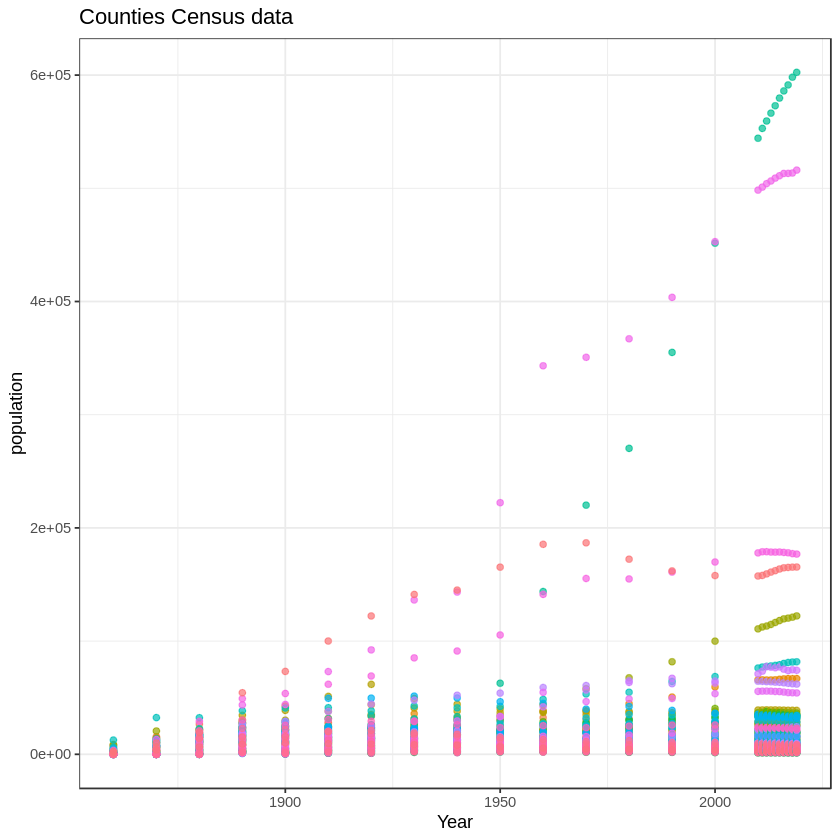

In [6]:
ggplot(data = Kansas_Counties_population, aes(Year, population, color=County) )+geom_point(alpha=0.7, show.legend = F)+ theme_bw()+ggtitle("Counties Census data")  # Census data

#### Each color represents different counties in the state of kansas

In [7]:
summary(Kansas_Counties_population)


      County          Year              population    
 Allen   :  25   Min.   :1860-01-01   Min.   :     0  
 Anderson:  25   1st Qu.:1920-01-01   1st Qu.:  3496  
 Atchison:  25   Median :1980-01-01   Median :  8060  
 Barber  :  25   Mean   :1963-10-20   Mean   : 20693  
 Barton  :  25   3rd Qu.:2013-01-01   3rd Qu.: 18805  
 Bourbon :  25   Max.   :2019-01-01   Max.   :602401  
 (Other) :2475                                        

Since there are some many counties i will break the lest of counties into subset run there own ML model(Mechine learning ) and join the in the end 

 =====================================================================================================================

### Split the data by County

In [8]:
#filtering out the states that have oil production
Oil_County <- filter(Kansas_Counties_population, (County == 'Franklin') | (County == 'Neosho') |
                                    (County == 'Wilson') | (County == 'Anderson') | (County == 'Woodson') |
                                    (County == 'Ellis') | (County == 'Allen') | (County == 'Montgomery') |
                                    (County == 'Miami')
                                    )


In [9]:
#forloop to separate counties to own dataframes
for (i in Oil_County$County)
    {
        assign(i, subset(Oil_County, County == i)) 
        
    } 

In [10]:
for (County in Oil_County$County)
    {
        #Create a dataframe of inbetween years
        assign(paste(County,".population",sep=""), data.frame( "County" = County , "Year" = seq(as.Date("1990-01-01"), as.Date("2019-12-01"), by= "month" ))) 
         
    } 

In [11]:
Franklin.population <- Franklin.population[!(Franklin.population$Year %in% Franklin$Year),]

Ellis.population <- Ellis.population[!(Ellis.population$Year %in% Ellis$Year),]

Allen.population <- Allen.population[!(Allen.population$Year %in% Allen$Year),]



 =====================================================================================================================

### look at the population Trends of the oil Counites

Since the 9 selective oil counties have different graphic behaviors we will look into using different modles for each 


##### Neosho

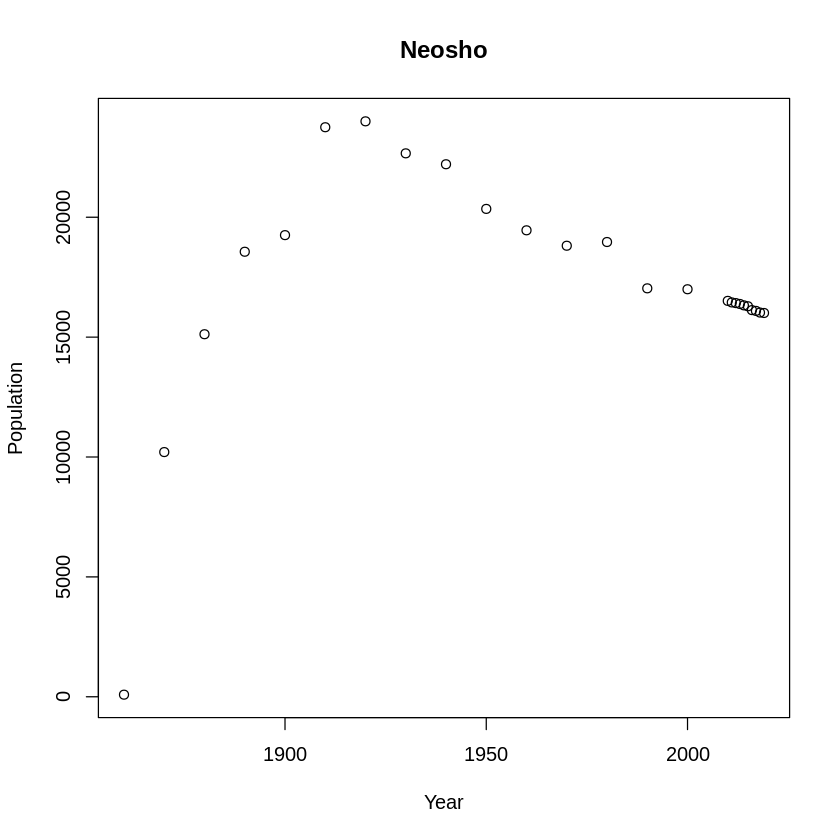

In [12]:
plot(population ~ Year, data = Neosho, main = "Neosho", xlab = "Year", ylab = "Population")

##### Wilson

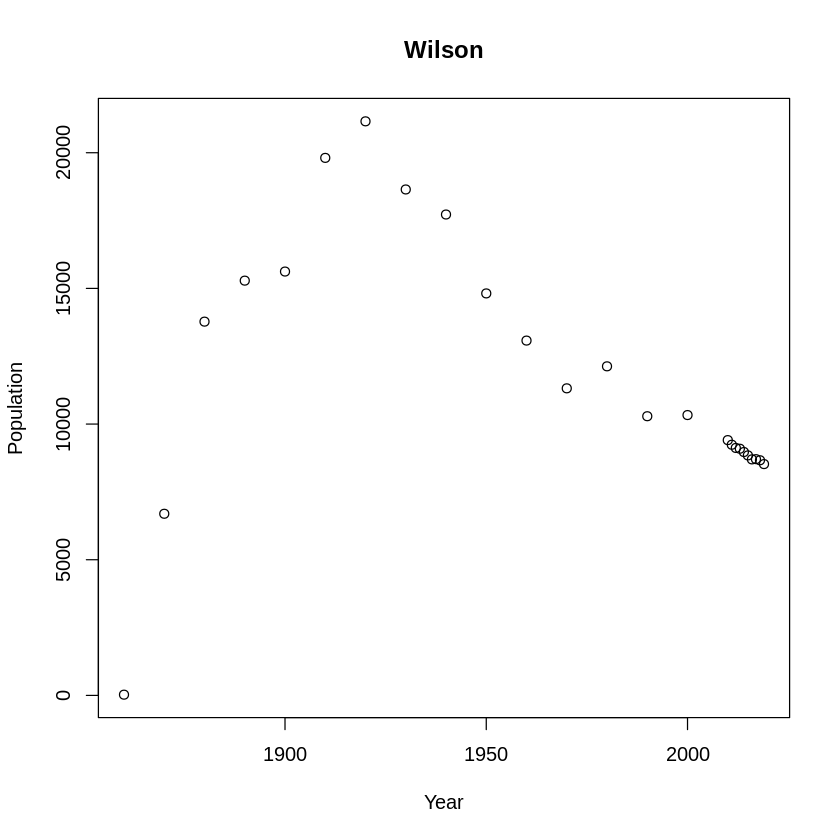

In [13]:
plot(population ~ Year, data = Wilson, main = "Wilson", xlab = "Year", ylab = "Population")

##### Anderson

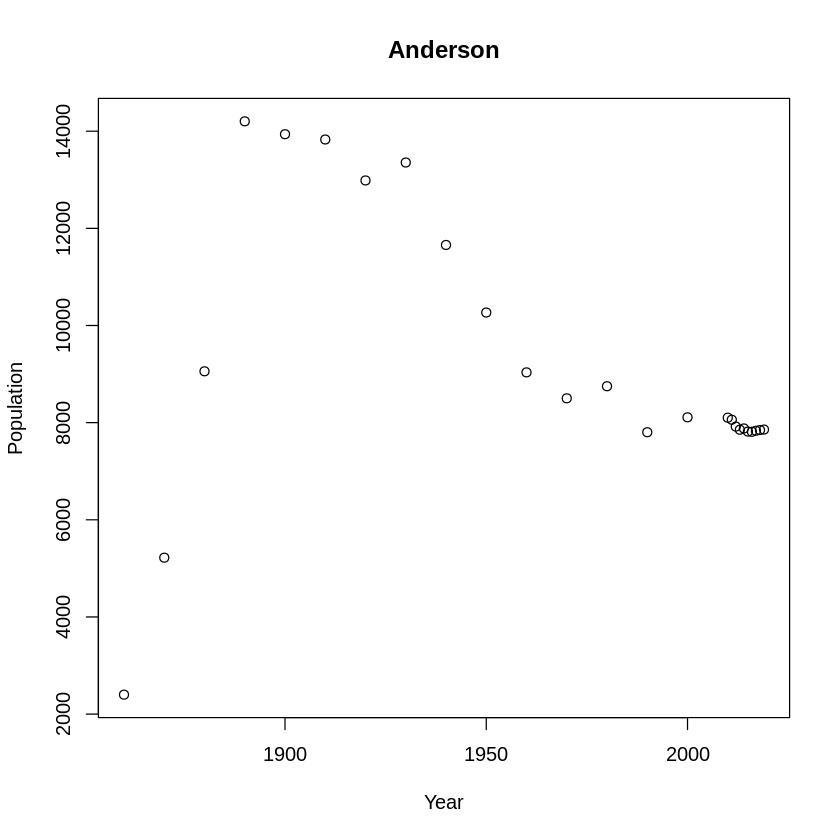

In [14]:
plot(population ~ Year, data = Anderson, main = "Anderson", xlab = "Year", ylab = "Population")

##### Woodson

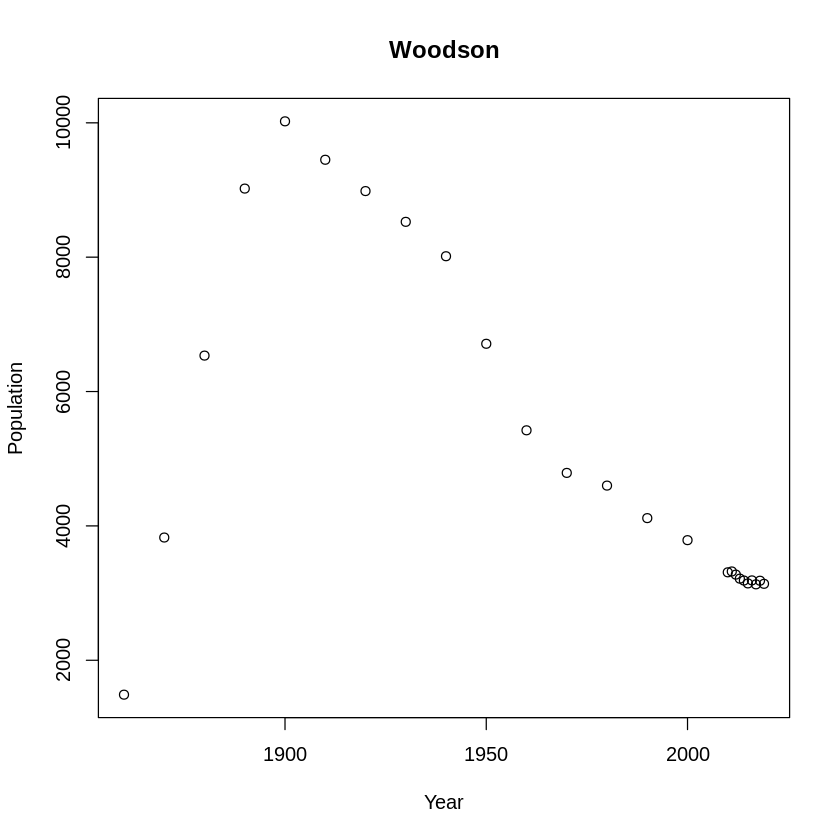

In [15]:
plot(population ~ Year, data = Woodson, main = "Woodson", xlab = "Year", ylab = "Population")

##### Montgomery

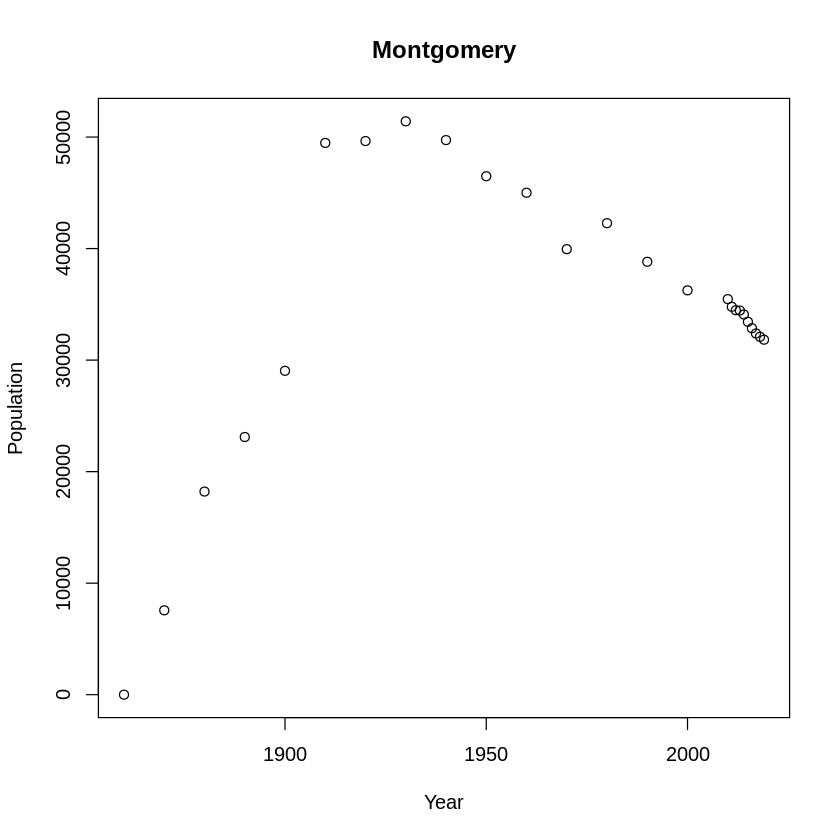

In [16]:
plot(population ~ Year, data = Montgomery, main = "Montgomery", xlab = "Year", ylab = "Population")

##### Allen

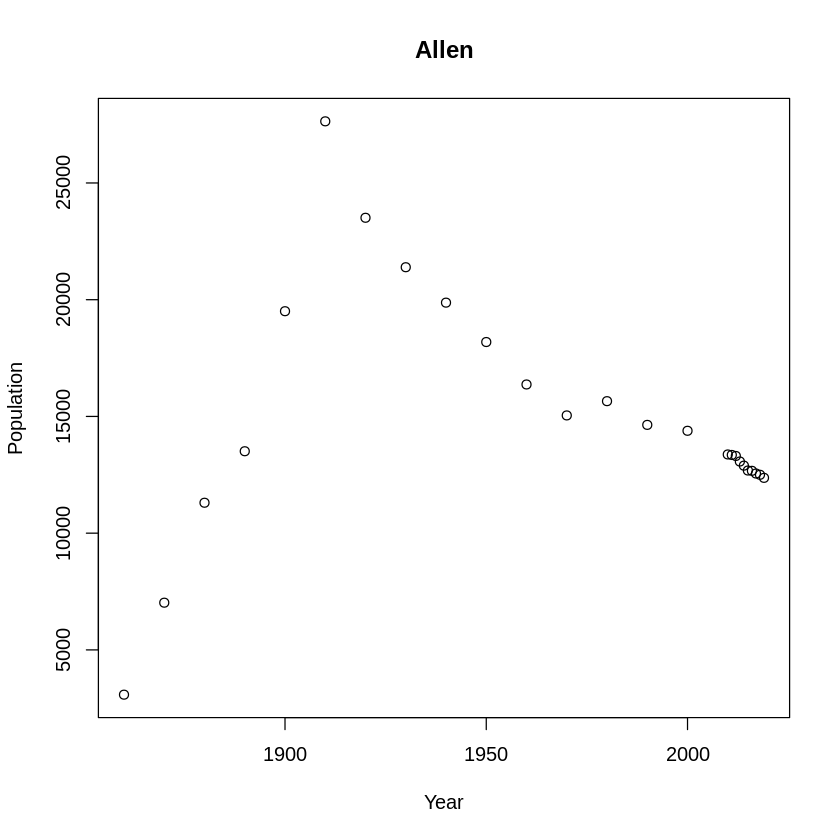

In [17]:
plot(population ~ Year, data = Allen, main = "Allen", xlab = "Year", ylab = "Population")

##### Miami

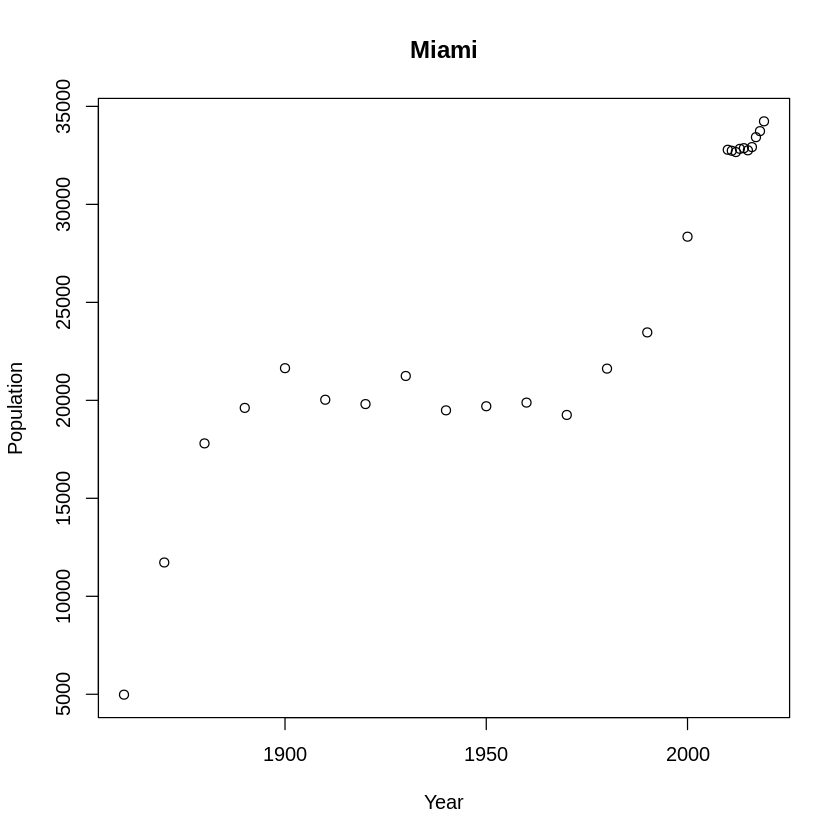

In [18]:
plot(population ~ Year, data = Miami, main = "Miami", xlab = "Year", ylab = "Population")

##### Franklin

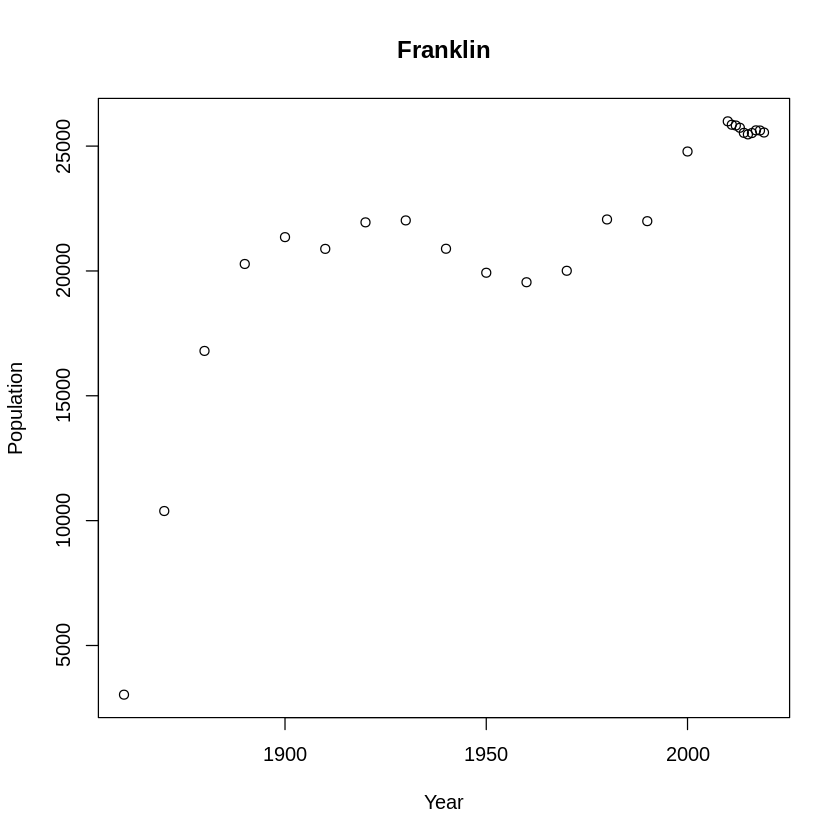

In [19]:
plot(population ~ Year, data = Franklin, main = "Franklin", xlab = "Year", ylab = "Population")

##### Ellis

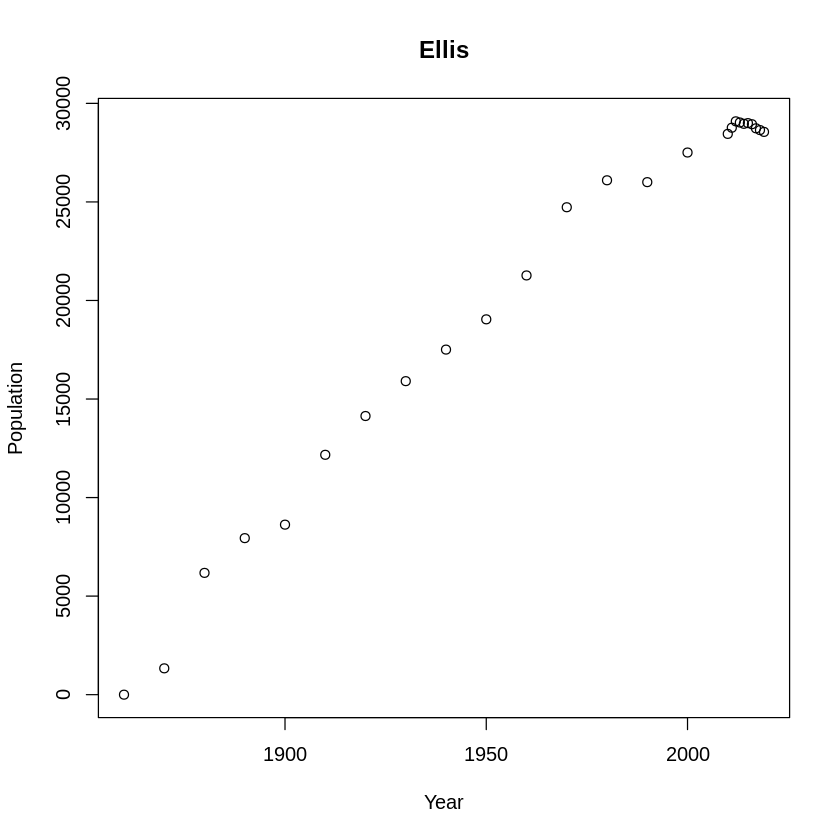

In [20]:
plot(population ~ Year, data = Ellis, main = "Ellis", xlab = "Year", ylab = "Population")

 =====================================================================================================================

### Split the data for other counties that we would look at 

In [21]:
#subset county Kansas_Counties_population
Dickinson <- subset(Kansas_Counties_population, County == "Dickinson" )

        #Create a dataframe of inbetween years
        Dickinson.population <- data.frame( "County" = "Dickinson" , "Year" = seq(as.Date("1990-01-01"), as.Date("2019-12-01"), by= "month" )) 


Dickinson.population <- Dickinson.population[!(Dickinson.population$Year %in% Dickinson$Year),]

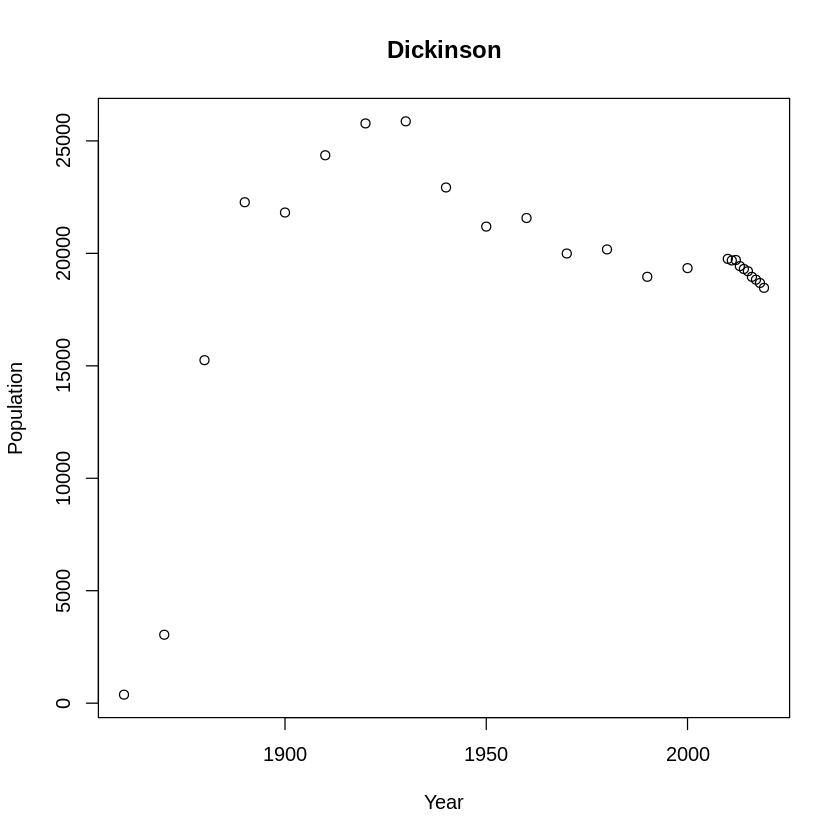

In [22]:
plot(population ~ Year, data = Dickinson, main = "Dickinson", xlab = "Year", ylab = "Population")

In [23]:
Riley <- subset(Kansas_Counties_population, County == "Riley")

        #Create a dataframe of inbetween years
        Riley.population <- data.frame( "County" = "Riley" , "Year" = seq(as.Date("1990-01-01"), as.Date("2019-12-01"), by= "month" )) 


Riley.population <- Riley.population[!(Riley.population$Year %in% Riley$Year),]

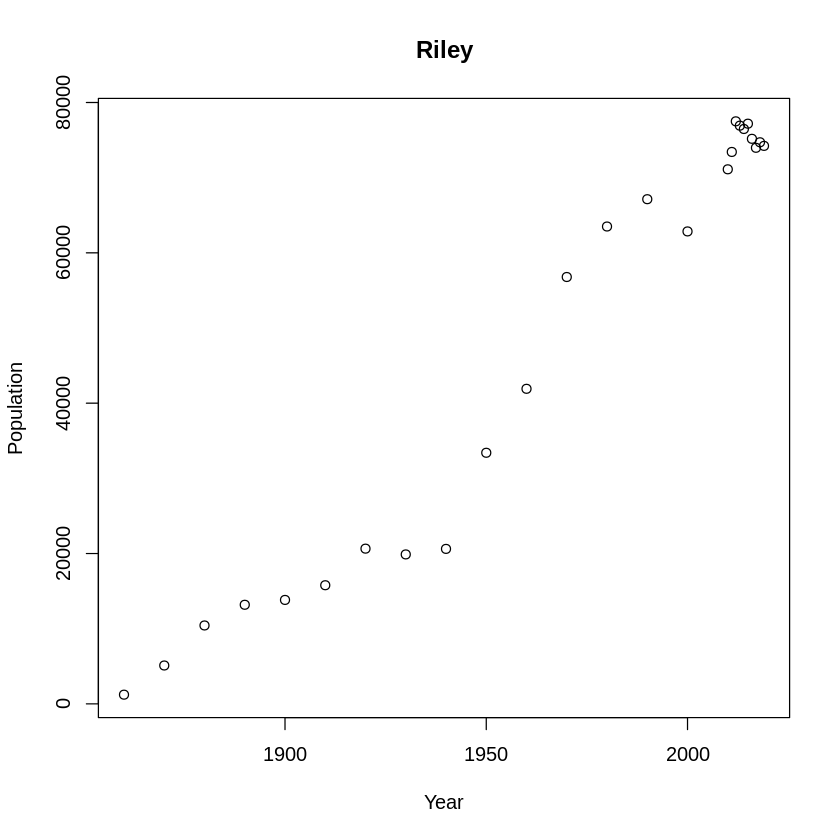

In [24]:
plot(population ~ Year, data = Riley, main = "Riley", xlab = "Year", ylab = "Population")

In [25]:
Pottawatomie <- subset(Kansas_Counties_population, County == "Pottawatomie")

        #Create a dataframe of inbetween years
        Pottawatomie.population <- data.frame( "County" = "Pottawatomie" , "Year" = seq(as.Date("1990-01-01"), as.Date("2019-12-01"), by= "month" )) 


Pottawatomie.population <- Pottawatomie.population[!(Pottawatomie.population$Year %in% Pottawatomie$Year),]

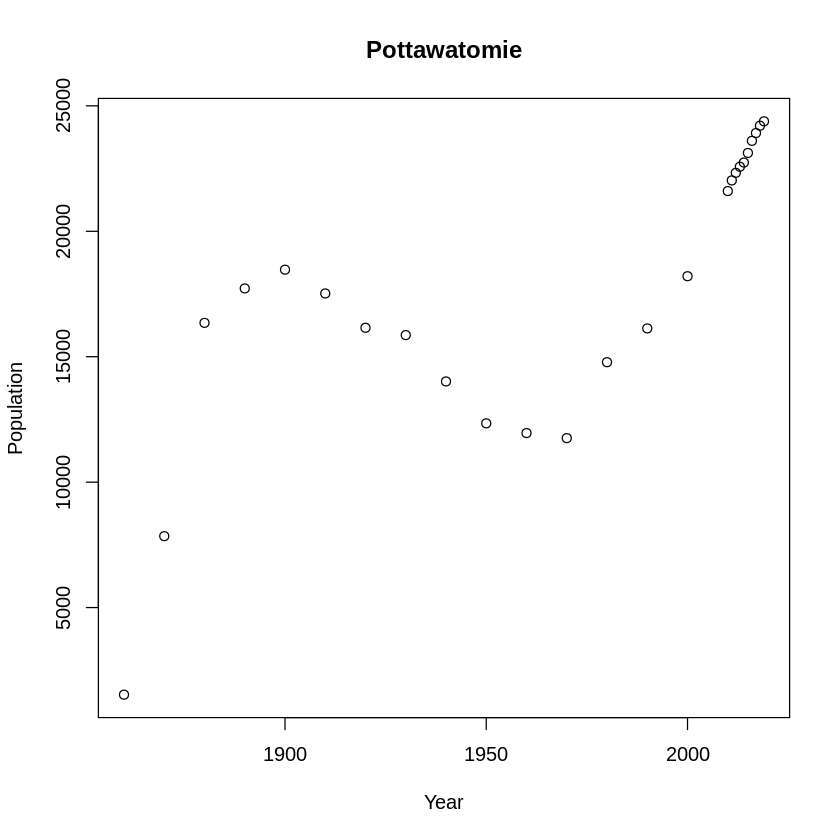

In [26]:
plot(population ~ Year, data = Pottawatomie, main = "Pottawatomie", xlab = "Year", ylab = "Population")

 =====================================================================================================================

### Mechine Learning ( Selective County)

##### Pottawatomie

##### B-Spline Basis for Polynomial Splines

In [27]:
# Take the assumed values and fit into the model.
Pottawatomie.population_lm <- lm(population ~ bs(Year, df = 5 ), data = Pottawatomie) #B-Spline Basis for Polynomial Splines

summary(Pottawatomie.population_lm)


Call:
lm(formula = population ~ bs(Year, df = 5), data = Pottawatomie)

Residuals:
     Min       1Q   Median       3Q      Max 
-1604.08  -163.58     0.23   146.72  1533.00 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1055.1      604.2   1.746 0.096907 .  
bs(Year, df = 5)1  26905.9     1340.9  20.065 3.00e-14 ***
bs(Year, df = 5)2   5884.4     1210.6   4.861 0.000109 ***
bs(Year, df = 5)3  12770.1     1158.9  11.019 1.08e-09 ***
bs(Year, df = 5)4  22787.4      680.1  33.505  < 2e-16 ***
bs(Year, df = 5)5  23333.9      826.0  28.249  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 689.8 on 19 degrees of freedom
Multiple R-squared:  0.9885,	Adjusted R-squared:  0.9854 
F-statistic: 325.3 on 5 and 19 DF,  p-value: < 2.2e-16


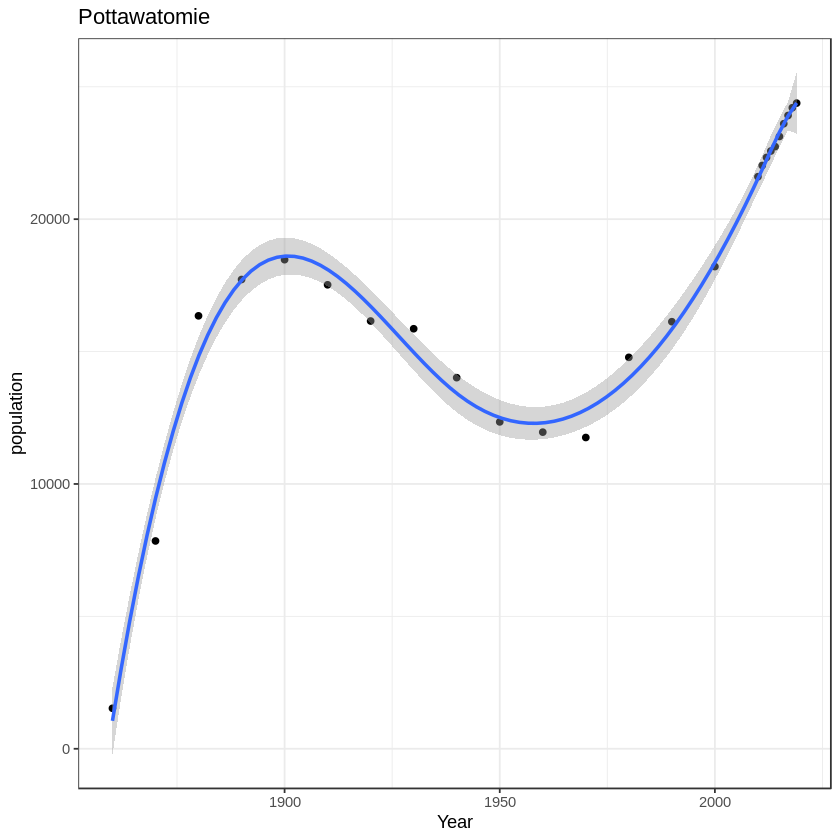

In [28]:
ggplot(Pottawatomie , aes(Year, population) ) + geom_point() + stat_smooth(method = lm, formula = y ~ bs(x, , df = 5 )) +
theme_bw()+ggtitle("Pottawatomie")  

In [29]:
# Make predictions
Pottawatomie.population$population <-  predict(object = Pottawatomie.population_lm,     # The model
                                                            newdata = Pottawatomie.population)   # dataframe of new data


Warning message in bs(Year, degree = 3L, knots = c(`33.33333%` = -10958, `66.66667%` = 14975:
“some 'x' values beyond boundary knots may cause ill-conditioned bases”

In [30]:
head(Pottawatomie.population)

,County,Year,population
,<fct>,<date>,<dbl>
2,Pottawatomie,1990-02-01,15862.37
3,Pottawatomie,1990-03-01,15879.22
4,Pottawatomie,1990-04-01,15897.93
5,Pottawatomie,1990-05-01,15916.08
6,Pottawatomie,1990-06-01,15934.87
7,Pottawatomie,1990-07-01,15953.11


In [31]:
# Add datasets vertically
Full_Pottawatomie.population <- rbind(Pottawatomie, Pottawatomie.population)
#sort by year
Full_Pottawatomie.population <- Full_Pottawatomie.population[order(Full_Pottawatomie.population$Year),]
# filter
Full_Pottawatomie.population <- filter(Full_Pottawatomie.population, Year >= 1990)

tail(Full_Pottawatomie.population)

,County,Year,population
,<fct>,<date>,<dbl>
356,Pottawatomie,2019-07-01,24485.07
357,Pottawatomie,2019-08-01,24500.38
358,Pottawatomie,2019-09-01,24515.36
359,Pottawatomie,2019-10-01,24529.52
360,Pottawatomie,2019-11-01,24543.81
361,Pottawatomie,2019-12-01,24557.30


 =====================================================================================================================

##### Riley

##### B-Spline Basis for Polynomial Splines

In [32]:
# Take the assumed values and fit into the model.
Riley.population_lm <- lm(population ~ bs(Year, df = 5 ), data = Riley) #B-Spline Basis for Polynomial Splines


summary(Riley.population_lm)


Call:
lm(formula = population ~ bs(Year, df = 5), data = Riley)

Residuals:
    Min      1Q  Median      3Q     Max 
-9520.2  -636.1   117.0  1724.2  5911.5 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)          849.3     2997.1   0.283   0.7800    
bs(Year, df = 5)1  17492.1     6651.9   2.630   0.0165 *  
bs(Year, df = 5)2   2003.5     6005.3   0.334   0.7423    
bs(Year, df = 5)3  77190.4     5749.0  13.427 3.80e-11 ***
bs(Year, df = 5)4  73672.8     3373.9  21.836 6.41e-15 ***
bs(Year, df = 5)5  73759.0     4097.6  18.000 2.14e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3422 on 19 degrees of freedom
Multiple R-squared:  0.9887,	Adjusted R-squared:  0.9857 
F-statistic:   332 on 5 and 19 DF,  p-value: < 2.2e-16


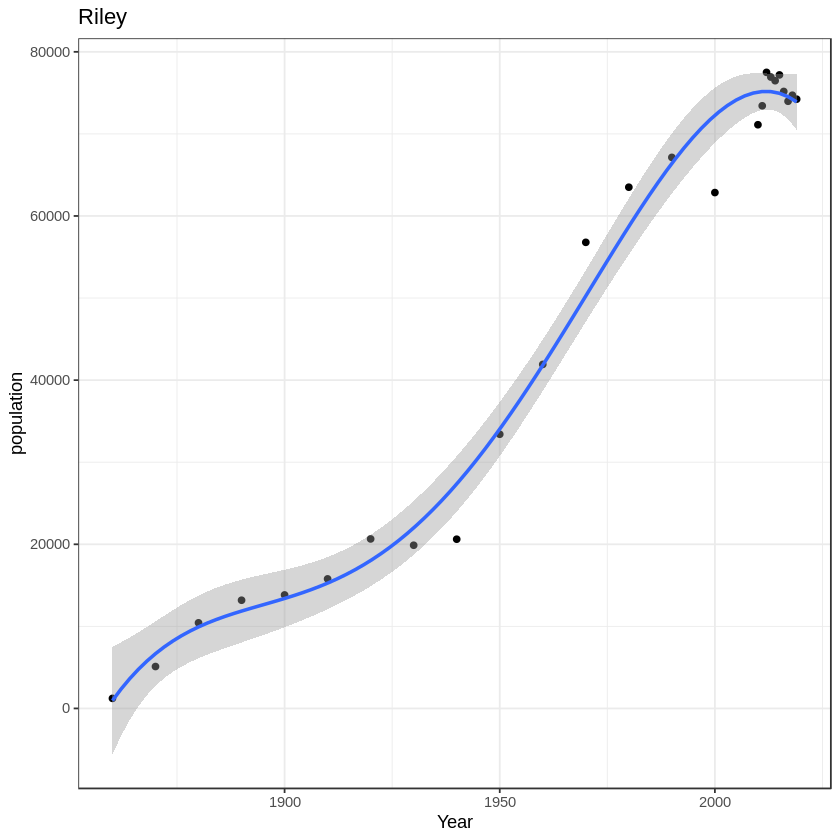

In [33]:
ggplot(Riley , aes(Year, population) ) + geom_point() + stat_smooth(method = lm, formula = y ~ poly(x, 4, raw = TRUE)) +
theme_bw()+ggtitle("Riley")

In [34]:
# Make predictions
Riley.population$population <-  predict(object = Riley.population_lm,     # The model
                                                            newdata = Riley.population)   # dataframe of new data


Warning message in bs(Year, degree = 3L, knots = c(`33.33333%` = -10958, `66.66667%` = 14975:
“some 'x' values beyond boundary knots may cause ill-conditioned bases”

In [35]:
# Add datasets vertically
Full_Riley.population <- rbind(Riley, Riley.population)
#sort by year
Full_Riley.population <- Full_Riley.population[order(Full_Riley.population$Year),]
# filter
Full_Riley.population <- filter(Full_Riley.population, Year >= 1990)

tail(Full_Riley.population)

,County,Year,population
,<fct>,<date>,<dbl>
356,Riley,2019-07-01,74629.61
357,Riley,2019-08-01,74634.37
358,Riley,2019-09-01,74639.47
359,Riley,2019-10-01,74644.74
360,Riley,2019-11-01,74650.53
361,Riley,2019-12-01,74656.47


 =====================================================================================================================

##### Ellis

#### Linear Regression 

In [36]:
# Take the assumed values and fit into the model.
Ellis.population_lm <-  lm(population ~ Year, data = Ellis)

summary(Ellis.population_lm)


Call:
lm(formula = population ~ Year, data = Ellis)

Residuals:
    Min      1Q  Median      3Q     Max 
-2783.1  -785.0   -78.7   995.2  2971.0 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.176e+04  2.882e+02   75.50   <2e-16 ***
Year        4.830e-01  1.471e-02   32.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1431 on 23 degrees of freedom
Multiple R-squared:  0.9791,	Adjusted R-squared:  0.9782 
F-statistic:  1077 on 1 and 23 DF,  p-value: < 2.2e-16


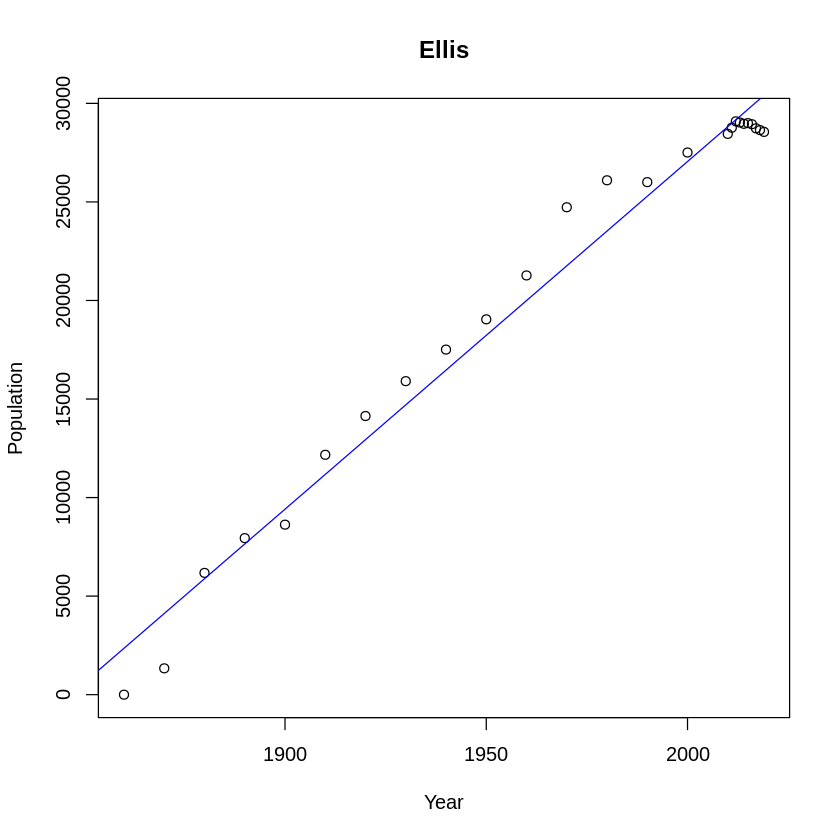

In [37]:
plot(population ~ Year, data = Ellis, main = "Ellis", 
    xlab = "Year", ylab = "Population")  # Census data

abline(Ellis.population_lm, col="blue")

In [38]:
# Make predictions
Ellis.population$population <-  predict(object = Ellis.population_lm,     # The model
                                                            newdata = Ellis.population)   # dataframe of new data


In [39]:
# Add datasets vertically
Full_Ellis.population <- rbind(Ellis, Ellis.population)
#sort by year
Full_Ellis.population <- Full_Ellis.population[order(Full_Ellis.population$Year),]
# filter
Full_Ellis.population <- filter(Full_Ellis.population, Year >= 1990)

tail(Full_Ellis.population)

,County,Year,population
,<fct>,<date>,<dbl>
356,Ellis,2019-07-01,30490.06
357,Ellis,2019-08-01,30505.03
358,Ellis,2019-09-01,30520.00
359,Ellis,2019-10-01,30534.49
360,Ellis,2019-11-01,30549.47
361,Ellis,2019-12-01,30563.95


 =====================================================================================================================

##### Dickinson

##### B-Spline Basis for Polynomial Splines

In [40]:
# Take the assumed values and fit into the model.
Dickinson.population_lm <- lm(population ~ bs(Year, df = 5 ), data = Dickinson) #B-Spline Basis for Polynomial Splines


summary(Dickinson.population_lm)


Call:
lm(formula = population ~ bs(Year, df = 5), data = Dickinson)

Residuals:
    Min      1Q  Median      3Q     Max 
-4597.9  -301.1   -40.2   442.1  2526.1 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -2011       1289  -1.560    0.135    
bs(Year, df = 5)1    29378       2861  10.268 3.43e-09 ***
bs(Year, df = 5)2    27552       2583  10.667 1.84e-09 ***
bs(Year, df = 5)3    19099       2473   7.724 2.81e-07 ***
bs(Year, df = 5)4    21902       1451  15.093 4.94e-12 ***
bs(Year, df = 5)5    20176       1762  11.448 5.72e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1472 on 19 degrees of freedom
Multiple R-squared:  0.9477,	Adjusted R-squared:  0.934 
F-statistic:  68.9 on 5 and 19 DF,  p-value: 1.64e-11


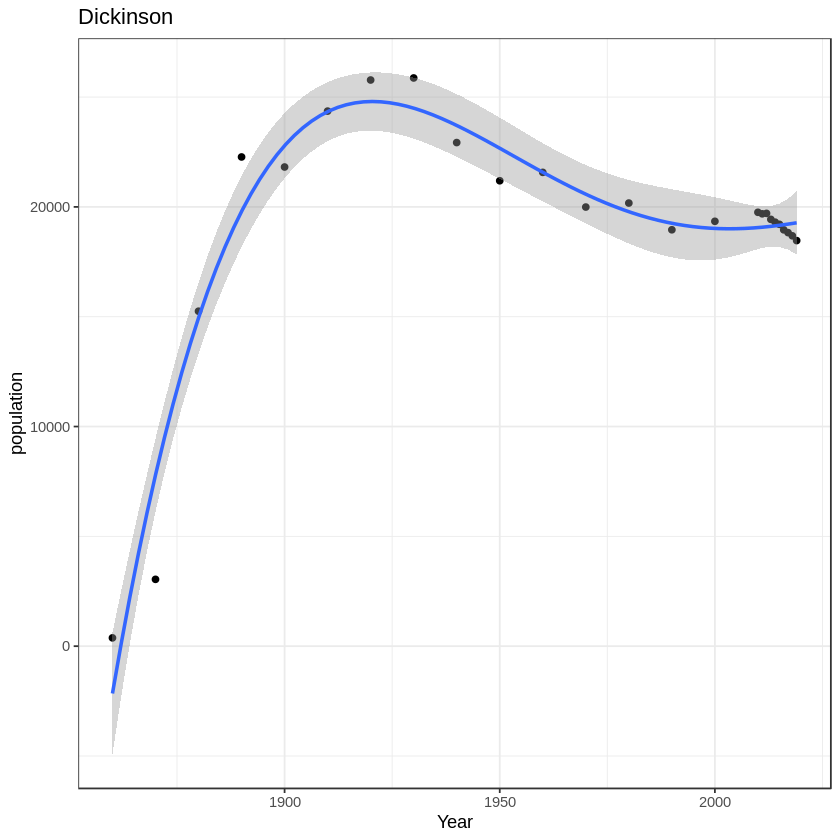

In [41]:
ggplot(Dickinson , aes(Year, population) ) + geom_point() + stat_smooth(method = lm, formula = y ~ poly(x, 4, raw = TRUE)) +
theme_bw()+ggtitle("Dickinson")  

In [42]:
# Make predictions
Dickinson.population$population <-  predict(object = Dickinson.population_lm,     # The model
                                                            newdata = Dickinson.population)   # dataframe of new data


Warning message in bs(Year, degree = 3L, knots = c(`33.33333%` = -10958, `66.66667%` = 14975:
“some 'x' values beyond boundary knots may cause ill-conditioned bases”

In [43]:
# Add datasets vertically
Full_Dickinson.population <- rbind(Dickinson, Dickinson.population)
#sort by year
Full_Dickinson.population <- Full_Dickinson.population[order(Full_Dickinson.population$Year),]
# filter
Full_Dickinson.population <- filter(Full_Dickinson.population, Year >= 1990)

tail(Full_Dickinson.population)

,County,Year,population
,<fct>,<date>,<dbl>
356,Dickinson,2019-07-01,17821.18
357,Dickinson,2019-08-01,17757.35
358,Dickinson,2019-09-01,17692.06
359,Dickinson,2019-10-01,17627.48
360,Dickinson,2019-11-01,17559.28
361,Dickinson,2019-12-01,17491.84


 =====================================================================================================================

### Saving Estimated Population Data to CSV

In [44]:
write.csv(Full_Pottawatomie.population, file="../../../casestudy_data/group_2/Estimated_Pottawatomie.population.csv")

write.csv(Full_Ellis.population, file="../../../casestudy_data/group_2/Estimated_Ellis.population.csv")

write.csv(Full_Dickinson.population, file="../../../casestudy_data/group_2/Estimated_Dickinson.population.csv")

write.csv(Full_Riley.population, file="../../../casestudy_data/group_2/Estimated_Riley.population.csv")

 =====================================================================================================================